[*********************100%***********************]  3 of 3 completed


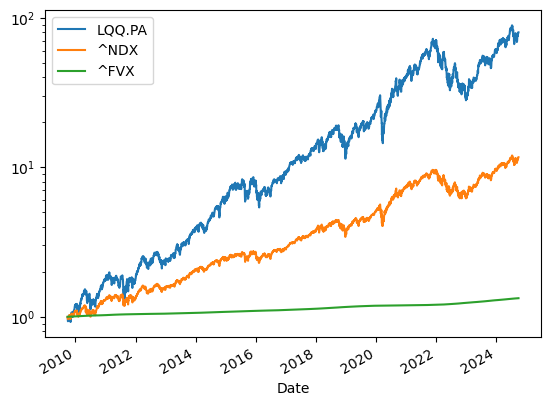

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Tickers to download
tickers   = ["LQQ.PA", "^NDX"]  # 2x Levearged NASDAQ100, NASDAQ100
risk_free = ["^FVX"]            # US treasury yield (5 years)

# Download the data from yf
data      = yf.download(tickers+risk_free,group_by='Date', start="2009-09-27", end="2024-09-27")

# Calculate the number of years and estimate the trading days per year
num_years               = (data.index[-1]-data.index[0]).days/365
trading_days_in_year    = int(len(data.index)/num_years)

# For every ticker in the list, forward fill the empty days and generate a column of percentual change
for t in tickers:
    data[(t, 'Adj Close')] = data[(t, 'Adj Close')].ffill()
    data[(t,'Pct Change')] = data[(t, 'Adj Close')].pct_change()
# The tickers in the risk_free list represent percentual changes thus they need to be treated differently
for t in risk_free:
    data[(t, 'Adj Close')]  = data[(t, 'Adj Close')].ffill()
    data[(t, 'Pct Change')] = data[(t,'Adj Close')].div(100*trading_days_in_year)
    data[(t, 'Adj Close')]  = data[(t, 'Pct Change')].add(1).cumprod()
# Sort again the indexes (after adding new columns)
data.sort_index(axis=1, inplace=True) 

# Plot data
for t in tickers+risk_free:
    data[(t,'Pct Change')].add(1).cumprod().plot(label=t)

plt.yscale('log')
plt.legend()
plt.show()

In [22]:
print(f"Period: {num_years:.1f} years")
riskfree_return =  ((data[('^FVX', 'Adj Close')].iloc[-1]/data[('^FVX', 'Adj Close')].iloc[0])**(1/num_years)-1)
print(f"Annualized risk-free return: {100*riskfree_return:.1f} %")
for t in tickers:
    print(f"Ticker: {t}")
    excess_returns      = (data[(t, 'Adj Close')].iloc[-1]/data[(t, 'Adj Close')].iloc[0])**(1/num_years)-1 -riskfree_return
    standard_deviation  = data[(t, 'Pct Change')].std() * (trading_days_in_year**0.5)
    sharpe_ratio        = excess_returns / standard_deviation
    currmax = maximum_drowdown= 0
    for i in range(len(data.index)):
        currmax = max(currmax, data[(t, 'Adj Close')].iloc[i])
        maximum_drowdown = min(maximum_drowdown, (data[(t, 'Adj Close')].iloc[i]-currmax)/currmax)
    print(f"    Excess return      = {100*excess_returns:.1f} %")
    print(f"    Maximum drowdown   = {-100*maximum_drowdown:.1f} %")
    print(f"    Standard deviation = {100*standard_deviation:.1f} %")
    print(f"    Sharpe ratio       = {sharpe_ratio:.2f}")
    print("-------")

Period: 15.0 years
Annualized risk-free return: 1.9%
Ticker: LQQ.PA
    Excess return      = 32.0%
    Maximum drowdown   = 61.2%
    Standard deviation = 36.7%
    Sharpe ratio       = 0.87
-------
Ticker: ^NDX
    Excess return      = 15.9%
    Maximum drowdown   = 35.6%
    Standard deviation = 20.6%
    Sharpe ratio       = 0.77
-------


In [33]:
windows = [365]
for w in windows:
    signal = data[('^NDX', 'Adj Close')]>data[('^NDX', 'Adj Close')].rolling(window = w).mean()
    data[('MyStrategy', 'Pct Change')] = np.where(signal, data[('LQQ.PA', 'Pct Change')], data[('^FVX', 'Pct Change')])
    data[('MyStrategy', 'Adj Close')] = data[('MyStrategy', 'Pct Change')].add(1).cumprod()
    excess_returns      = (data[('MyStrategy', 'Adj Close')].iloc[-1]/data[('MyStrategy', 'Adj Close')].iloc[0])**(1/num_years)-1 -riskfree_return
    standard_deviation  = data[('MyStrategy', 'Pct Change')].std() * (trading_days_in_year**0.5)
    sharpe_ratio        = excess_returns / standard_deviation
    print(f"Window size: {w} days")
    print(f"    Excess return      = {100*excess_returns:.1f} %")
    print(f"    Standard deviation = {100*standard_deviation:.1f} %")
    print(f"    Sharpe ratio       = {sharpe_ratio:.2f}")
    print("-------")

Window size: 365 days
    Excess return      = 42.1 %
    Standard deviation = 30.2 %
    Sharpe ratio       = 1.40
-------


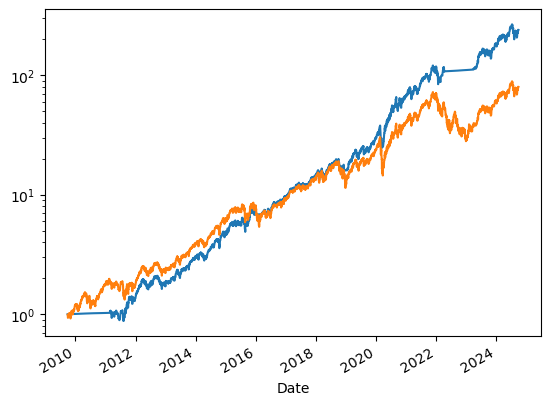

In [34]:

data[('MyStrategy', 'Pct Change')].add(1).cumprod().plot()
data[('LQQ.PA', 'Pct Change')].add(1).cumprod().plot()
plt.yscale('log')


In [204]:
data = yf.download(["LQQ.PA", "CNDX.AS"],group_by='Date', start="2021-09-27", end="2024-09-27")

[*********************100%***********************]  2 of 2 completed


In [203]:
data.stack(level=0)

C:\Users\aless\AppData\Local\Temp\ipykernel_19812\983712724.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data.stack(level=0)


Price                                     Open         High          Low  \
Date                      Ticker                                           
2021-09-27 00:00:00+00:00 CNDX.AS   741.400024   741.900024   729.900024   
                          LQQ.PA    814.799988   815.000000   786.599976   
2021-09-28 00:00:00+00:00 CNDX.AS   728.500000   730.000000   715.400024   
                          LQQ.PA    784.700012   787.000000   754.900024   
2021-09-29 00:00:00+00:00 CNDX.AS   718.500000   724.000000   718.500000   
...                                        ...          ...          ...   
2024-09-24 00:00:00+00:00 LQQ.PA   1084.000000  1086.800049  1061.199951   
2024-09-25 00:00:00+00:00 CNDX.AS  1014.000000  1024.199951  1013.599976   
                          LQQ.PA   1070.800049  1092.400024  1070.000000   
2024-09-26 00:00:00+00:00 CNDX.AS  1036.800049  1042.000000  1022.200012   
                          LQQ.PA   1115.599976  1125.599976  1085.400024   

Price                                    Close    Adj Close  Volume  
Date                      Ticker                                     
2021-09-27 00:00:00+00:00 CNDX.AS   732.700012   732.700012    1886  
                          LQQ.PA    795.000000   795.000000    6276  
2021-09-28 00:00:00+00:00 CNDX.AS   715.799988   715.799988    3272  
                          LQQ.PA    757.000000   757.000000    5770  
2021-09-29 00:00:00+00:00 CNDX.AS   720.099976   720.099976    1926  
...                                        ...          ...     ...  
2024-09-24 00:00:00+00:00 LQQ.PA   1079.400024  1079.400024    3814  
2024-09-25 00:00:00+00:00 CNDX.AS  1023.400024  1023.400024    1434  
                          LQQ.PA   1088.199951  1088.199951    2574  
2024-09-26 00:00:00+00:00 CNDX.AS  1024.599976  1024.599976    2265  
                          LQQ.PA   1089.599976  1089.599976    5657  

[1544 rows x 6 columns]

In [431]:
data.head()

Ticker                      IWDA.AS                                         \
Price                     Adj Close  Close   High    Low   Open Pct Change   
Date                                                                         
2009-09-28 00:00:00+00:00     16.99  16.99  16.99  16.99  16.99        NaN   
2009-09-29 00:00:00+00:00     16.99  16.99  16.99  16.99  16.99        0.0   
2009-09-30 00:00:00+00:00     16.99  16.99  16.99  16.99  16.99        0.0   
2009-10-01 00:00:00+00:00     16.99  16.99  16.99  16.99  16.99        0.0   
2009-10-02 00:00:00+00:00     16.99  16.99  16.99  16.99  16.99        0.0   

Ticker                              LQQ.PA                ...   ^FVX  \
Price                     Volume Adj Close  Close   High  ...   Open   
Date                                                      ...          
2009-09-28 00:00:00+00:00    0.0     13.65  13.65  13.79  ...  2.373   
2009-09-29 00:00:00+00:00    0.0     13.50  13.50  13.85  ...  2.348   
2009-09-30 00:00:00+00:00    0.0     13.35  13.35  13.61  ...  2.357   
2009-10-01 00:00:00+00:00    0.0     12.95  12.95  13.56  ...  2.293   
2009-10-02 00:00:00+00:00    0.0     12.74  12.74  12.90  ...  2.177   

Ticker                                              ^NDX               \
Price                     Pct Change Volume    Adj Close        Close   
Date                                                                    
2009-09-28 00:00:00+00:00   0.000091    0.0  1724.589966  1724.589966   
2009-09-29 00:00:00+00:00   0.000091    0.0  1717.670044  1717.670044   
2009-09-30 00:00:00+00:00   0.000090    0.0  1718.989990  1718.989990   
2009-10-01 00:00:00+00:00   0.000085    0.0  1666.410034  1666.410034   
2009-10-02 00:00:00+00:00   0.000085    0.0  1662.489990  1662.489990   

Ticker                                                                       \
Price                             High          Low         Open Pct Change   
Date                                                                          
2009-09-28 00:00:00+00:00  1733.790039  1702.520020  1702.949951        NaN   
2009-09-29 00:00:00+00:00  1732.310059  1709.280029  1724.199951  -0.004013   
2009-09-30 00:00:00+00:00  1731.439941  1691.760010  1723.910034   0.000768   
2009-10-01 00:00:00+00:00  1711.699951  1666.410034  1710.500000  -0.030588   
2009-10-02 00:00:00+00:00  1676.219971  1656.569946  1656.770020  -0.002352   

Ticker                                   
Price                            Volume  
Date                                     
2009-09-28 00:00:00+00:00  1.890030e+09  
2009-09-29 00:00:00+00:00  2.062970e+09  
2009-09-30 00:00:00+00:00  2.640660e+09  
2009-10-01 00:00:00+00:00  2.708170e+09  
2009-10-02 00:00:00+00:00  2.448110e+09  

[5 rows x 35 columns]